In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Superstore.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.shape

(9994, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

There are total 9994 rows and 21 columns in the data. Also there are null values for postal code.

In [5]:
data.dropna(inplace=True,axis=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9983 non-null   int64         
 1   Order ID       9983 non-null   object        
 2   Order Date     9983 non-null   datetime64[ns]
 3   Ship Date      9983 non-null   datetime64[ns]
 4   Ship Mode      9983 non-null   object        
 5   Customer ID    9983 non-null   object        
 6   Customer Name  9983 non-null   object        
 7   Segment        9983 non-null   object        
 8   Country        9983 non-null   object        
 9   City           9983 non-null   object        
 10  State          9983 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9983 non-null   object        
 13  Product ID     9983 non-null   object        
 14  Category       9983 non-null   object        
 15  Sub-Category   9983 n

In [7]:
data.drop(columns=['Country'],inplace=True)

In [8]:
data.drop(columns=['Customer Name'],inplace=True)

In [9]:
data.drop(columns=['Row ID'],inplace=True)

In [10]:
data.drop(columns=['Postal Code','Customer ID'],inplace=True)

In [11]:
data.drop(columns=['Order ID'],inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9983 non-null   datetime64[ns]
 1   Ship Date     9983 non-null   datetime64[ns]
 2   Ship Mode     9983 non-null   object        
 3   Segment       9983 non-null   object        
 4   City          9983 non-null   object        
 5   State         9983 non-null   object        
 6   Region        9983 non-null   object        
 7   Product ID    9983 non-null   object        
 8   Category      9983 non-null   object        
 9   Sub-Category  9983 non-null   object        
 10  Product Name  9983 non-null   object        
 11  Sales         9983 non-null   float64       
 12  Quantity      9983 non-null   int64         
 13  Discount      9983 non-null   float64       
 14  Profit        9983 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int6

In [13]:
data['order year']=pd.DatetimeIndex(data['Order Date']).year

In [14]:
data['order year'].unique()

array([2018, 2017, 2016, 2019], dtype=int64)

In [15]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [17]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [19]:
data.drop(columns=['City'],inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9983 non-null   datetime64[ns]
 1   Ship Date     9983 non-null   datetime64[ns]
 2   Ship Mode     9983 non-null   object        
 3   Segment       9983 non-null   object        
 4   State         9983 non-null   object        
 5   Region        9983 non-null   object        
 6   Product ID    9983 non-null   object        
 7   Category      9983 non-null   object        
 8   Sub-Category  9983 non-null   object        
 9   Product Name  9983 non-null   object        
 10  Sales         9983 non-null   float64       
 11  Quantity      9983 non-null   int64         
 12  Discount      9983 non-null   float64       
 13  Profit        9983 non-null   float64       
 14  order year    9983 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int6

In [21]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [22]:
ds=data['Sales'].describe()
ds

count     9983.000000
mean       229.216818
std        621.909610
min          0.444000
25%         17.280000
50%         54.384000
75%        209.905000
max      22638.480000
Name: Sales, dtype: float64

In [23]:
q1=ds[4]
q2=ds[5]
q3=ds[6]
iqr=q3-q1

In [24]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [25]:
lower, upper

(-271.6574999999999, 498.8424999999999)

In [26]:
import seaborn as sns

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

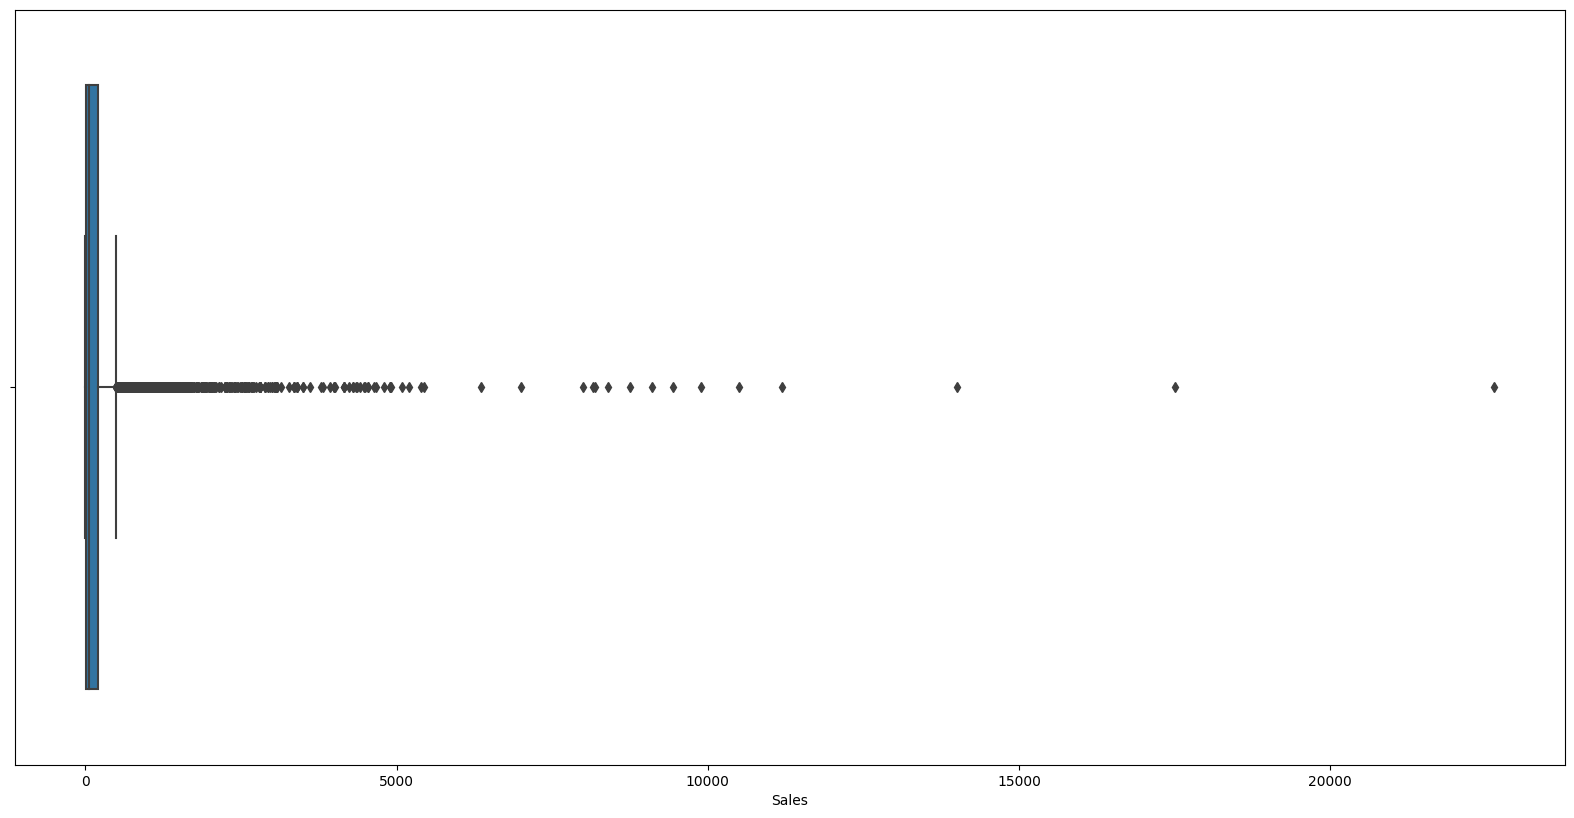

In [27]:
plt.figure(figsize=[20,10],dpi=100)
sns.boxplot(data['Sales'])

From the above boxplot we observe that there are many outliers. To remove outliers we first calculate the lower limit and upper limit.
Then the observations that lie between those limits will be imputed. When the observations are below lower limits they are replaced by the lower limit value,
and the observations that are above upper limit are replaced by upper limit.

In [28]:
def imputer(value):
    if value<lower:
        return lower
    elif value>upper:
        return upper
    else:
        return value
    

In [29]:
data['Sales']=data['Sales'].apply(imputer)

In [30]:
data['Sales'].describe()

count    9983.000000
mean      140.134804
std       168.666120
min         0.444000
25%        17.280000
50%        54.384000
75%       209.905000
max       498.842500
Name: Sales, dtype: float64

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

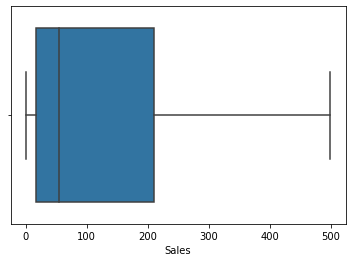

In [31]:
sns.boxplot(data['Sales'])

After removing the outliers we get the following boxplot. 
we repeat this procedure for all numerical variables.

In [32]:
df=data['Discount'].describe()
df

count    9983.000000
mean        0.156375
std         0.206501
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

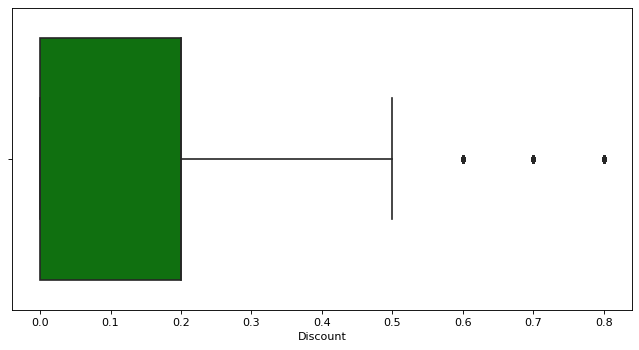

In [33]:
plt.figure(figsize=[10,5],dpi=80)
sns.boxplot(data['Discount'],color='green')

In [34]:
q1=df[4]
q2=df[5]
q3=df[6]
iqr=q3-q1

In [35]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
def imputer2(value):
    if value<lower:
        return lower
    elif value>upper:
        return upper
    else:
        return value

In [36]:
data['Discount']=data['Discount'].apply(imputer2)

In [37]:
data['Discount'].describe()

count    9983.000000
mean        0.137603
std         0.157701
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.500000
Name: Discount, dtype: float64

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

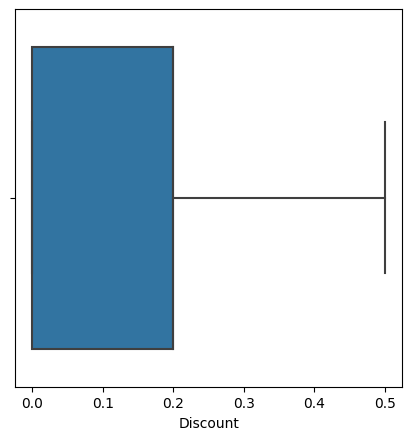

In [38]:
plt.figure(figsize=[5,5],dpi=100)
sns.boxplot(data['Discount'])

In [39]:
d=data['Profit'].describe()

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

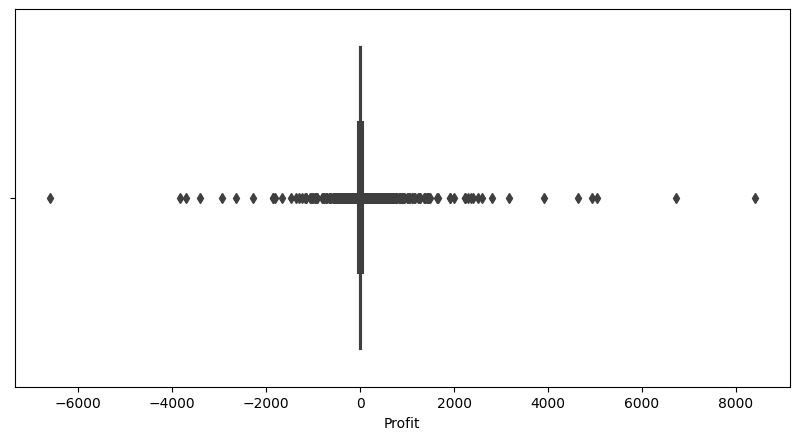

In [40]:
plt.figure(figsize=[10,5],dpi=100)
sns.boxplot(data['Profit'])

In [41]:
q1=d[4]
q2=d[5]
q3=d[6]
iqr=q3-q1

In [42]:
low=q1-1.5*iqr
up=q3+1.5*iqr

In [43]:
def impute(value):
    if value<low:
        return low
    elif value>up:
        return up
    else:
        return value                                                                

In [44]:
data['Profit']=data['Profit'].apply(impute)

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

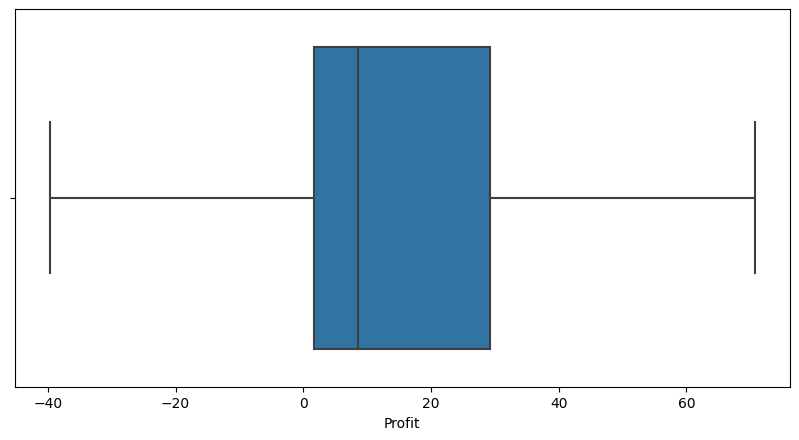

In [45]:
plt.figure(figsize=[10,5],dpi=100)
sns.boxplot(data['Profit'])

In [46]:
grp=data.groupby('order year')['Sales'].mean()
grp

order year
2016    142.663412
2017    144.191050
2018    139.764783
2019    136.324140
Name: Sales, dtype: float64

Text(0.5, 0, 'sale')

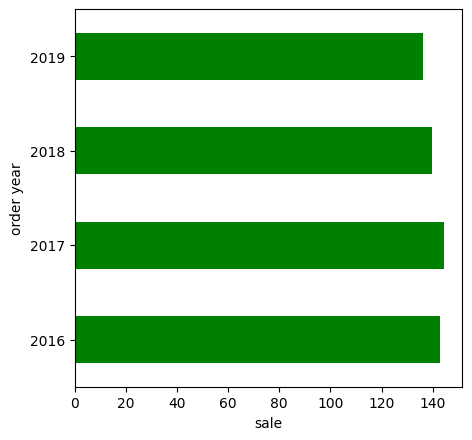

In [47]:
plt.figure(figsize=[5,5],dpi=100)
grp.plot(kind='barh',color='green')
plt.xlabel('sale')

Text(0.5, 0, 'Sales')

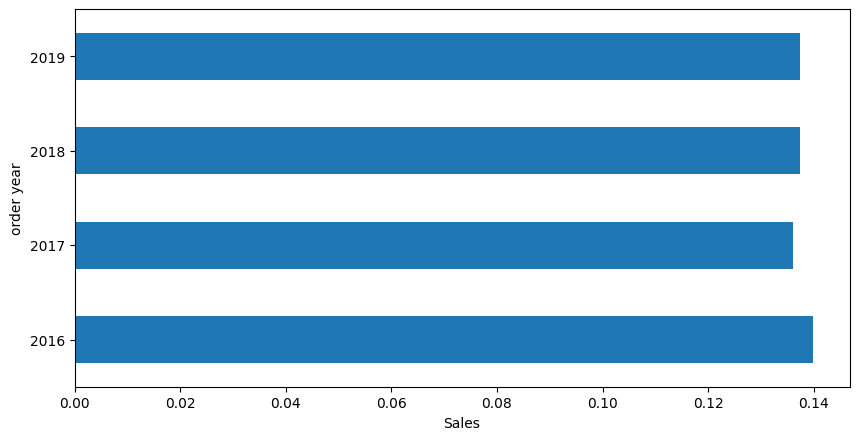

In [48]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('order year')['Discount'].mean().plot(kind='barh')
plt.xlabel('Sales')

<AxesSubplot:ylabel='order year'>

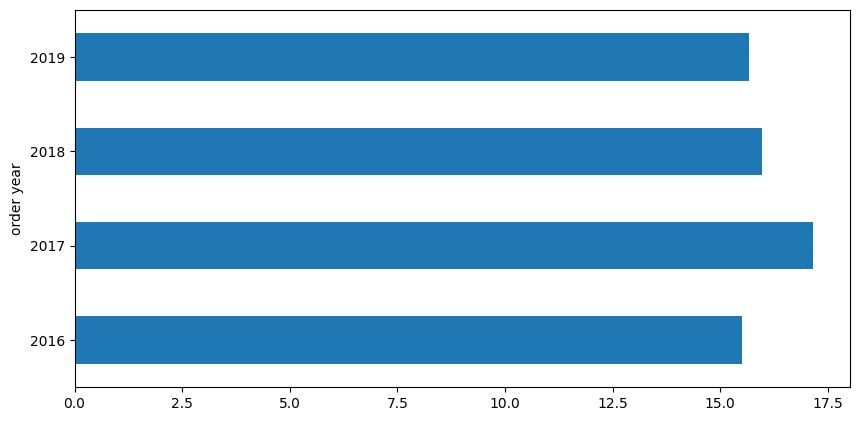

In [49]:
plt.figure(figsize=(10,5),dpi=100)
data.groupby('order year')['Profit'].mean().plot(kind='barh')

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

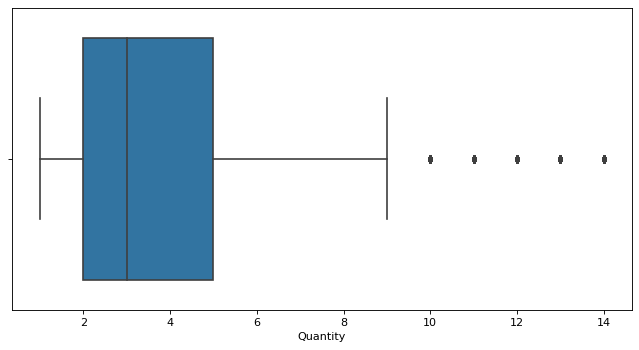

In [50]:
plt.figure(figsize=[10,5],dpi=80)
sns.boxplot(data['Quantity'])

In [51]:
df=data['Quantity'].describe()
df

count    9983.000000
mean        3.788741
std         2.223566
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [52]:
q1=df[4]
q2=df[5]
q3=df[6]
iqr=q3-q1
iqr

3.0

In [53]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower, upper

(-2.5, 9.5)

In [54]:
def imputing(value):
    if value<lower:
        return lower
    elif value>upper:
        return upper
    else:
        return value

In [55]:
data['Quantity']=data['Quantity'].apply(imputing)

C:\Users\User\Python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

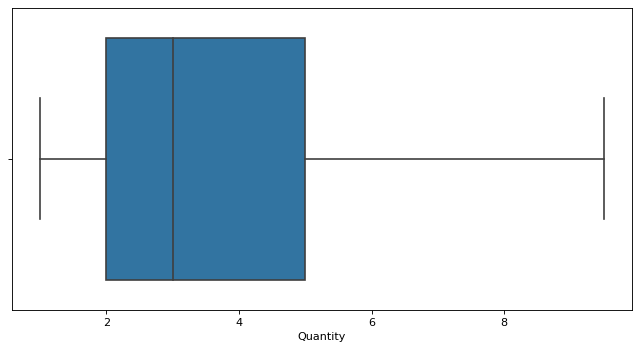

In [56]:
plt.figure(figsize=[10,5],dpi=80)
sns.boxplot(data['Quantity'])

In [57]:
data.groupby('order year')['Quantity'].mean()

order year
2016    3.757652
2017    3.755952
2018    3.770035
2019    3.734503
Name: Quantity, dtype: float64

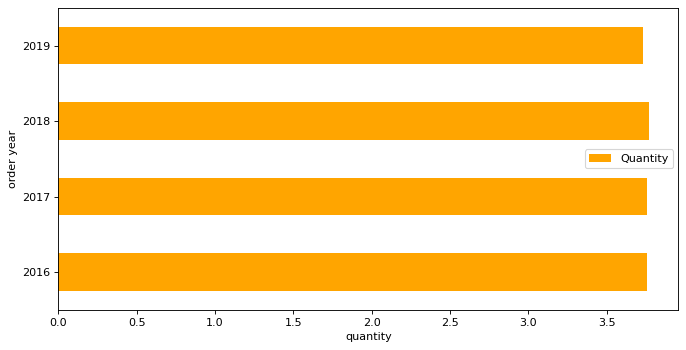

In [58]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('order year')['Quantity'].mean().plot(kind='barh',color='orange')
plt.xlabel('quantity')
plt.legend()

Text(0.5, 0, 'Sales')

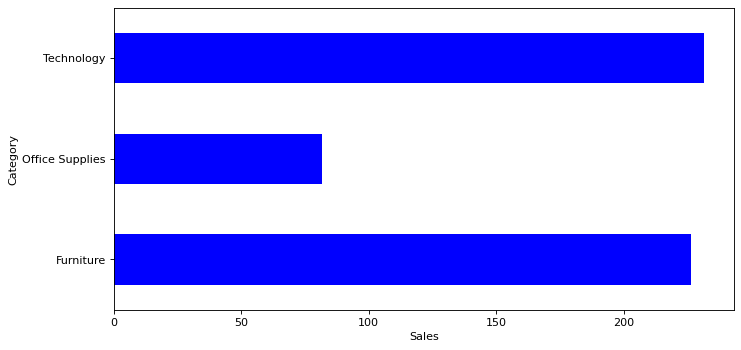

In [59]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category')['Sales'].mean().plot(kind='barh',color='blue')
plt.xlabel('Sales')

Text(0.5, 0, 'Discount')

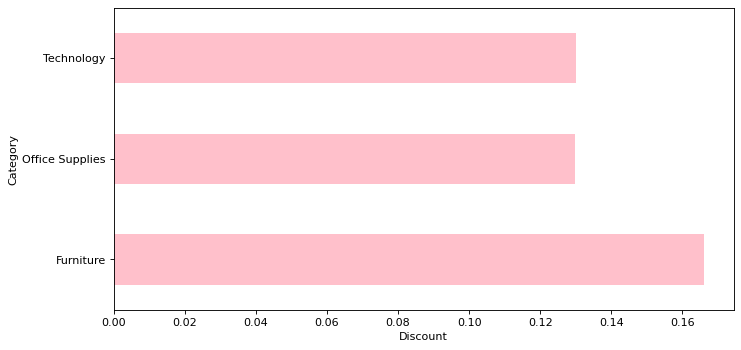

In [60]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category')['Discount'].mean().plot(kind='barh',color='pink')
plt.xlabel('Discount')

Text(0.5, 0, 'Quantity')

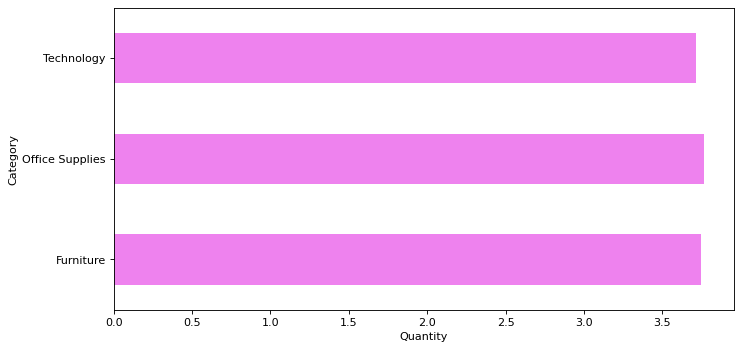

In [61]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category')['Quantity'].mean().plot(kind='barh',color='violet')
plt.xlabel('Quantity')

Text(0.5, 0, 'Profit')

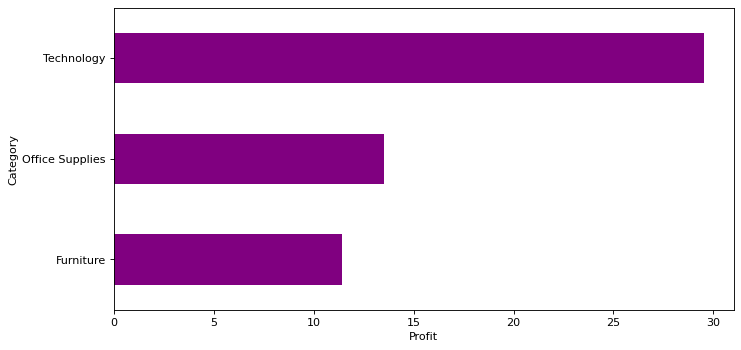

In [62]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category')['Profit'].mean().plot(kind='barh',color='purple')
plt.xlabel('Profit')

Text(0.5, 0, 'Sales')

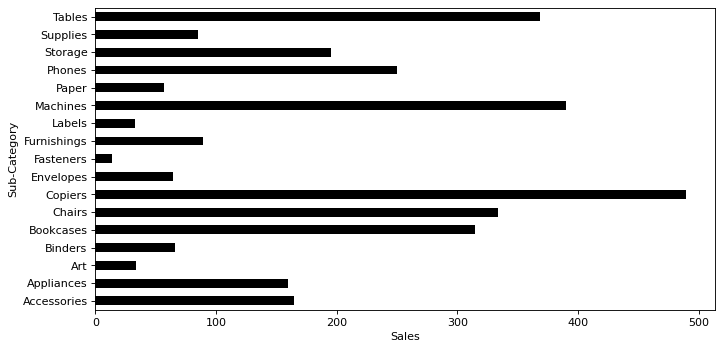

In [63]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Sub-Category')['Sales'].mean().plot(kind='barh',color='black')
plt.xlabel('Sales')

Text(0.5, 0, 'Discount')

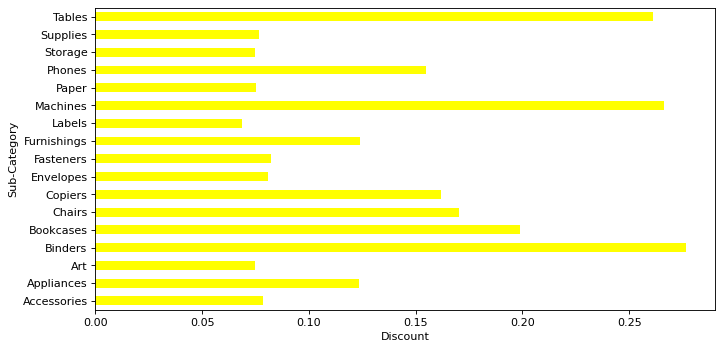

In [64]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Sub-Category')['Discount'].mean().plot(kind='barh',color='yellow')
plt.xlabel('Discount')

Text(0.5, 0, 'Quantity')

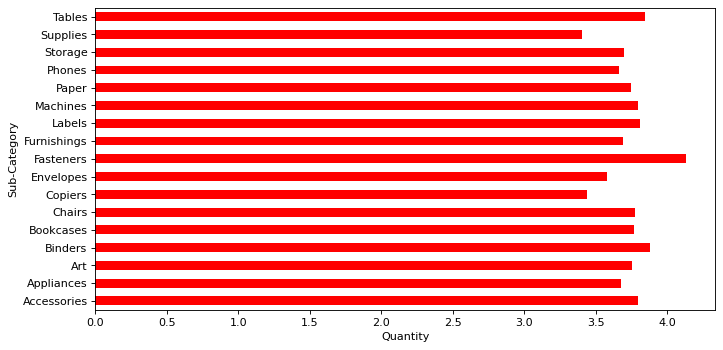

In [65]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Sub-Category')['Quantity'].mean().plot(kind='barh',color='red')
plt.xlabel('Quantity')

Text(0.5, 0, 'Profit')

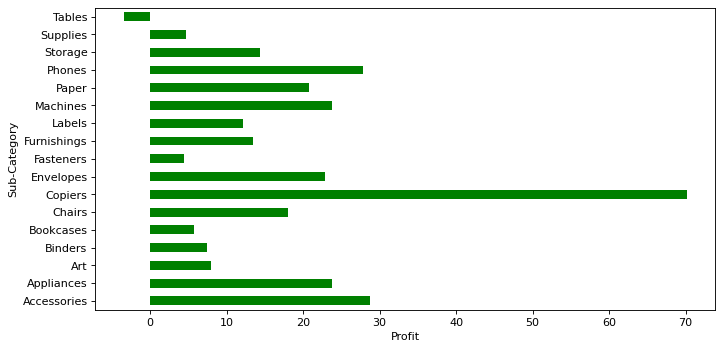

In [66]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Sub-Category')['Profit'].mean().plot(kind='barh',color='Green')
plt.xlabel('Profit')

Text(0.5, 0, 'Sales')

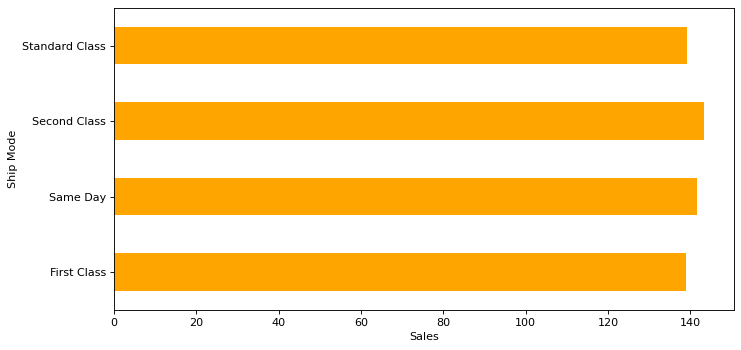

In [67]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Ship Mode')['Sales'].mean().plot(kind='barh',color='orange')
plt.xlabel('Sales')

Text(0.5, 0, 'Discount')

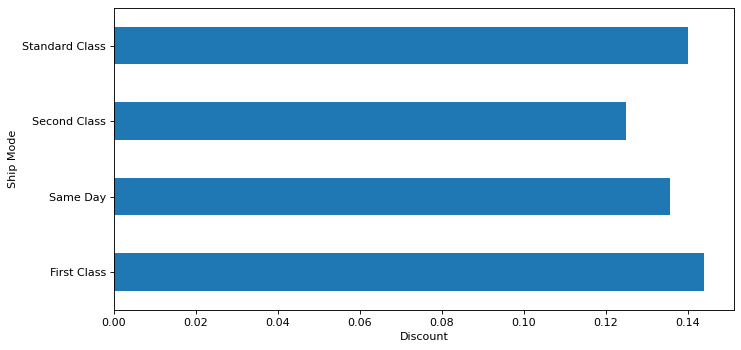

In [68]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Ship Mode')['Discount'].mean().plot(kind='barh')
plt.xlabel('Discount')

Text(0.5, 0, 'Quantity')

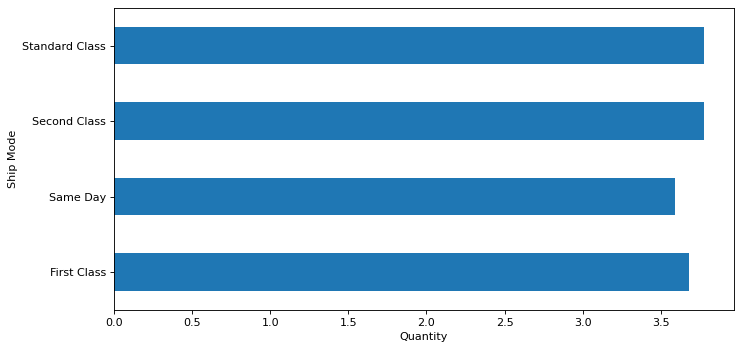

In [69]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Ship Mode')['Quantity'].mean().plot(kind='barh')
plt.xlabel('Quantity')

Text(0.5, 0, 'Profit')

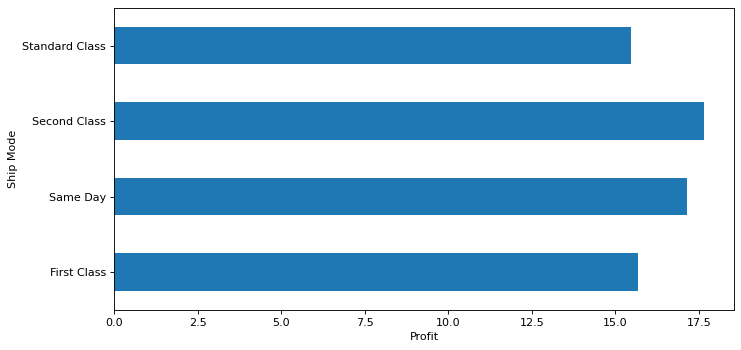

In [70]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Ship Mode')['Profit'].mean().plot(kind='barh')
plt.xlabel('Profit')

Text(0.5, 0, 'Sales')

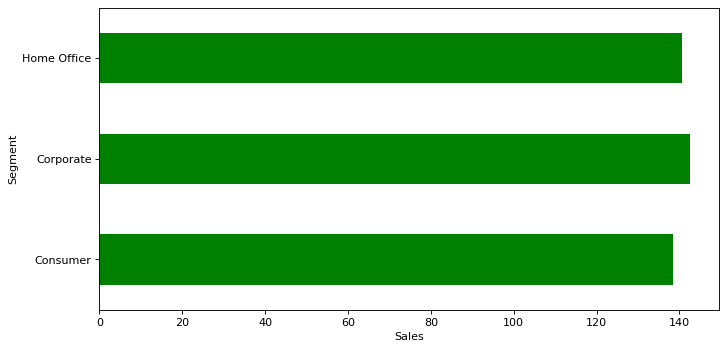

In [71]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment')['Sales'].mean().plot(kind='barh',color='green')
plt.xlabel('Sales')

Text(0.5, 0, 'Quantity')

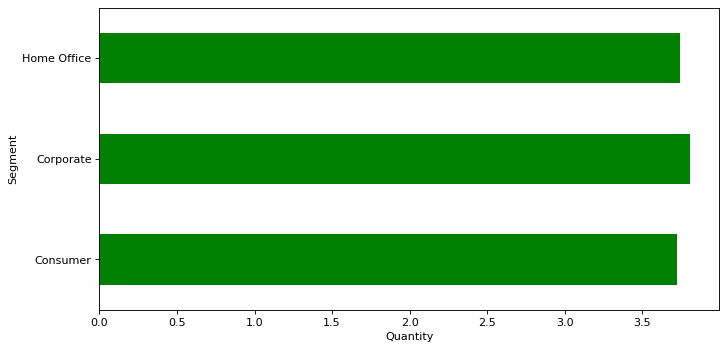

In [72]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment')['Quantity'].mean().plot(kind='barh',color='green')
plt.xlabel('Quantity')

Text(0.5, 0, 'Discount')

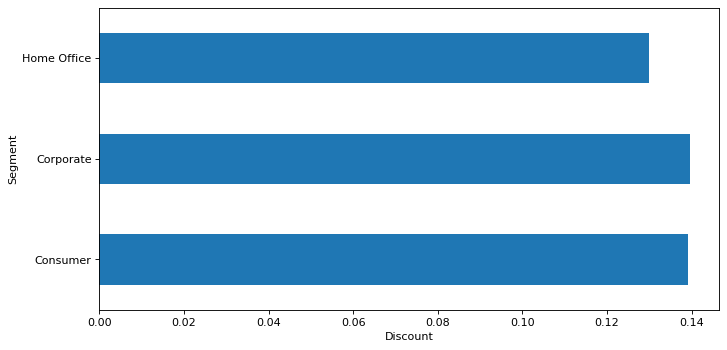

In [73]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment')['Discount'].mean().plot(kind='barh')
plt.xlabel('Discount')

Text(0.5, 0, 'Profit')

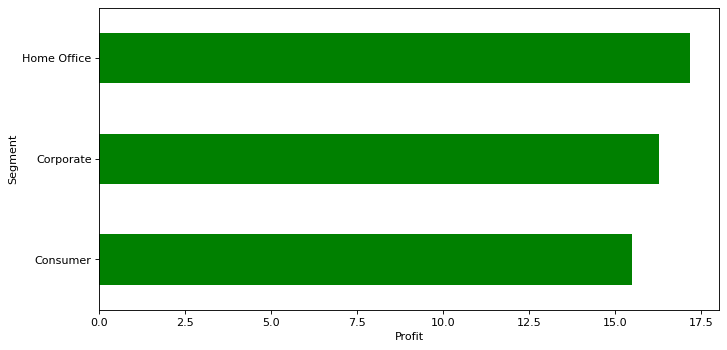

In [74]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment')['Profit'].mean().plot(kind='barh',color='green')
plt.xlabel('Profit')

# Correlation

To check the association between the numerical variables we calculate

In [75]:
cor=data.drop(columns=['order year']).corr()
cor

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.267331,-0.013741,0.449035
Quantity,0.267331,1.000000,0.004628,0.193976
Discount,-0.013741,0.004628,1.000000,-0.515177
Profit,0.449035,0.193976,-0.515177,1.000000


<AxesSubplot:>

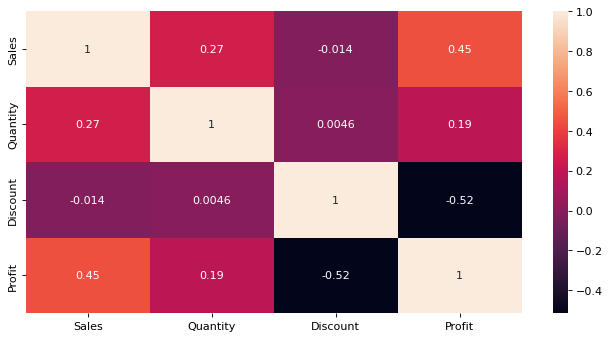

In [76]:
plt.figure(figsize=[10,5],dpi=80)
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

<AxesSubplot:ylabel='Region'>

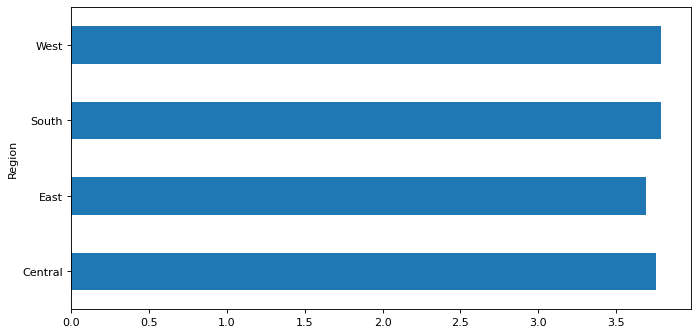

In [77]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Region')['Quantity'].mean().plot(kind='barh')

<AxesSubplot:ylabel='Region'>

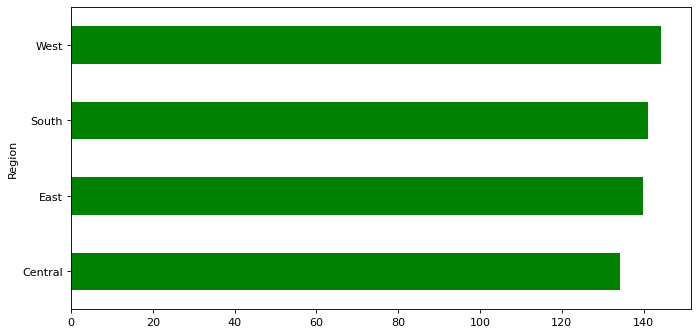

In [78]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Region')['Sales'].mean().plot(kind='barh',color='green')

<AxesSubplot:ylabel='Region'>

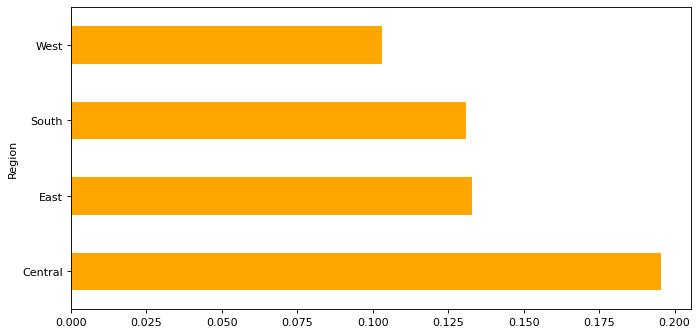

In [79]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Region')['Discount'].mean().plot(kind='barh',color='orange')

<AxesSubplot:ylabel='Region'>

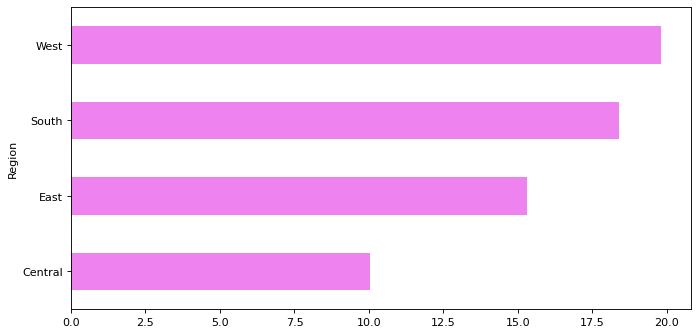

In [80]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Region')['Profit'].mean().plot(kind='barh',color='violet')

<AxesSubplot:xlabel='Profit', ylabel='Category'>

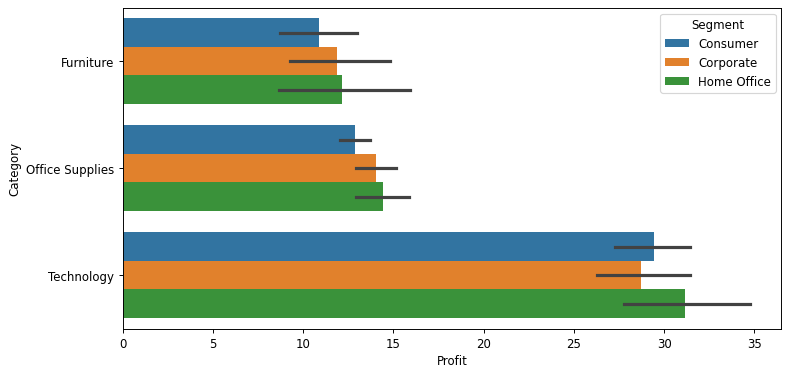

In [102]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Profit',y='Category',hue='Segment',data=data)

<AxesSubplot:xlabel='Profit', ylabel='Category'>

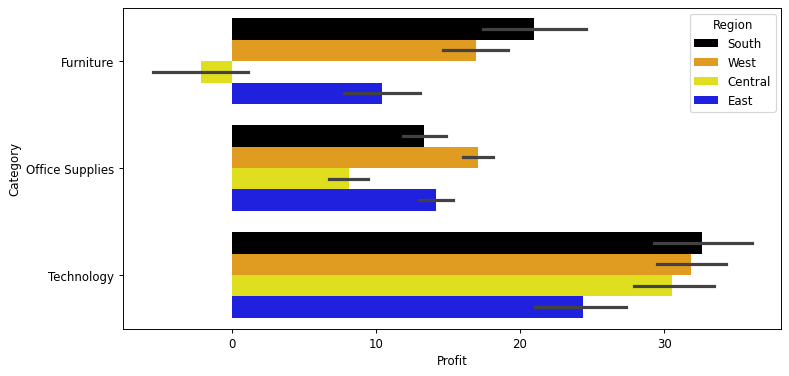

In [83]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Profit',y='Category',hue='Region',data=data,palette=['black','orange','yellow','blue'])

<AxesSubplot:xlabel='Profit', ylabel='Segment'>

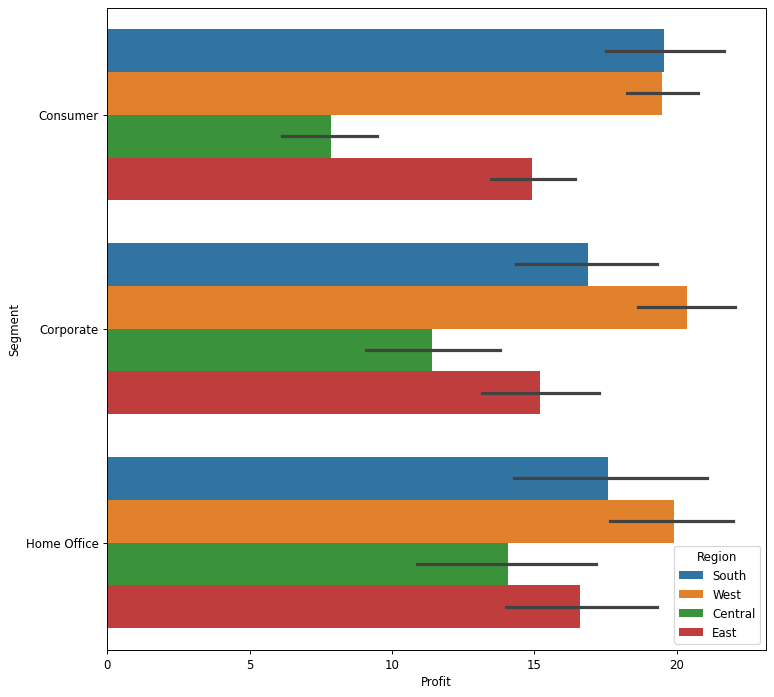

In [90]:
plt.figure(figsize=[10,10],dpi=85)
sns.barplot(x='Profit',y='Segment',hue='Region',data=data)

<AxesSubplot:xlabel='Sales', ylabel='Region'>

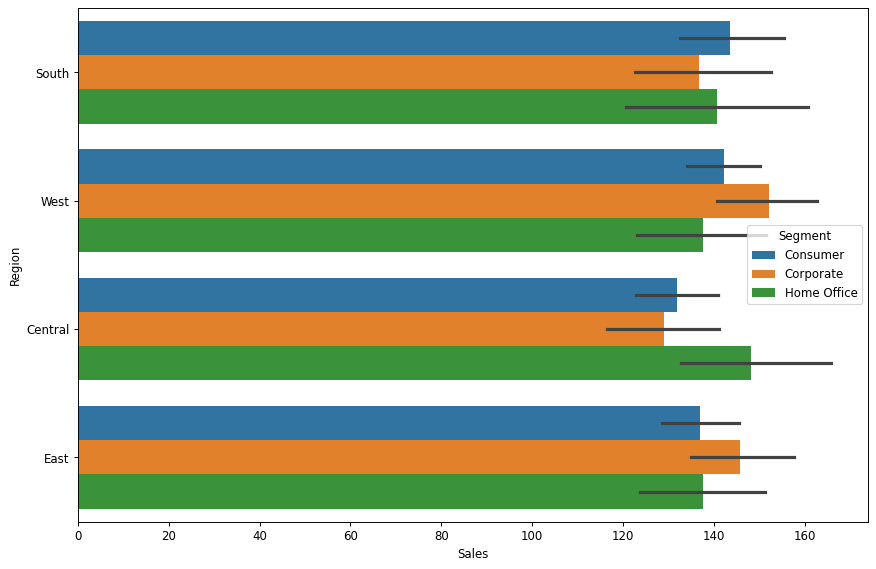

In [94]:
plt.figure(figsize=[12,8],dpi=85)
sns.barplot(x='Sales',y='Region',hue='Segment',data=data)

<AxesSubplot:xlabel='Sales', ylabel='Category'>

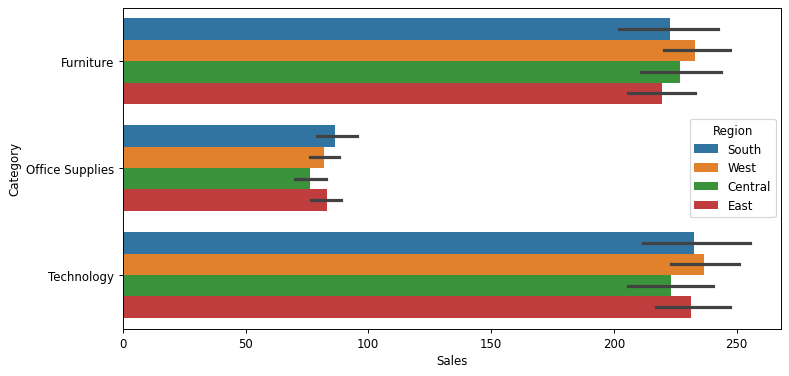

In [97]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Sales',y='Category',hue='Region',data=data)

<AxesSubplot:xlabel='Sales', ylabel='Segment'>

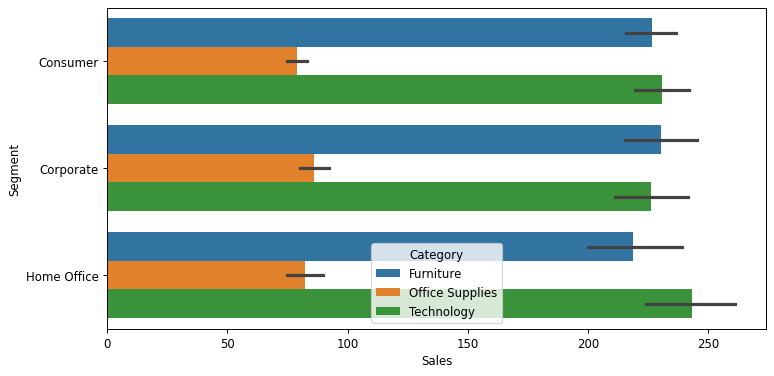

In [98]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Sales',y='Segment',hue='Category',data=data)

<AxesSubplot:xlabel='Discount', ylabel='Segment'>

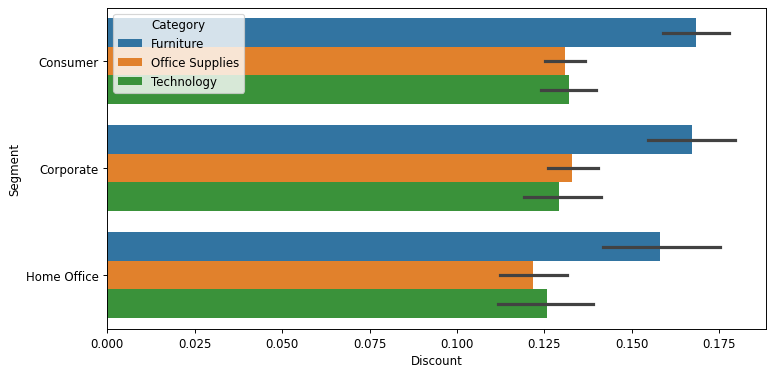

In [99]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Discount',y='Segment',hue='Category',data=data)

<AxesSubplot:xlabel='Discount', ylabel='Region'>

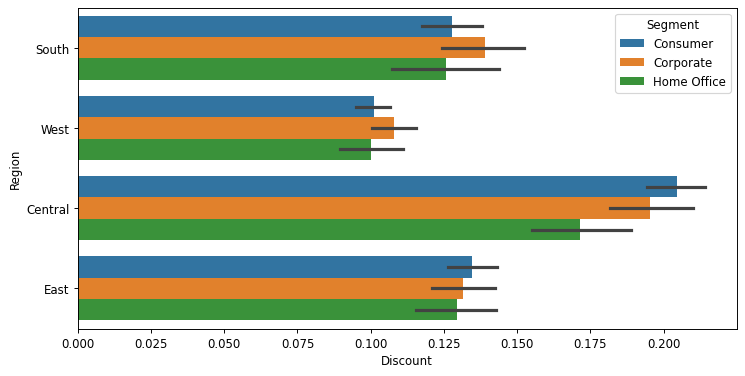

In [100]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Discount',y='Region',hue='Segment',data=data)

<AxesSubplot:xlabel='Discount', ylabel='Category'>

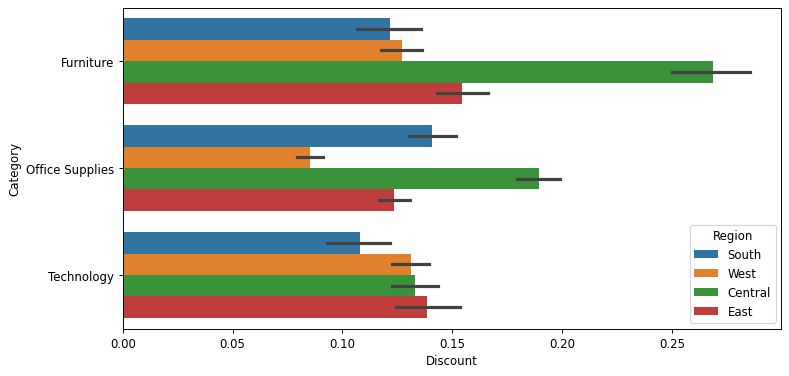

In [101]:
plt.figure(figsize=[10,5],dpi=85)
sns.barplot(x='Discount',y='Category',hue='Region',data=data)